In [1]:
import sys, os

In [2]:
sys.path.extend([os.path.abspath('../../../../')])

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Recovering the result of Vannitsem, Solé-Pomies and De Cruz (2019)

In this example, we recover the attractor shown in

* Vannitsem, S., Solé‐Pomies, R. and De Cruz, L. (2019). *Routes to long‐term atmospheric predictability in reduced‐order coupled ocean–atmosphere systems ‐ Impact of the ocean basin boundary conditions.* Quarterly Journal of the Royal Meteorological Society, **145**: 2791– 2805. [doi.org/10.1002/qj.3594](https://doi.org/10.1002/qj.3594)

obtained with a 2-layer channel QG atmosphere truncated at wavenumber 2 coupled, both by friction and heat exchange, to a shallow water ocean with the same modes. 


## Modules import

Loading of some modules...

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Initializing the random number generator (for reproducibility). -- Disable if needed.

In [5]:
np.random.seed(210217)

Importing the model's modules

In [6]:
from qgs.params.params import QgParams
from qgs.basis.fourier import contiguous_channel_basis
from qgs.integrators.integrator import RungeKuttaIntegrator
from qgs.functions.tendencies import create_tendencies

## Systems definition

General parameters

In [7]:
# Time parameters
dt = 0.1
# Saving the model state n steps
write_steps = 100

number_of_trajectories = 1

Setting some model parameters

In [8]:
# Model parameters instantiation with some non-default specs
model_parameters = QgParams({'n': 1.5})

# Mode truncation at the wavenumber 2 in both x and y spatial
# coordinates for the atmosphere
model_parameters.set_atmospheric_channel_fourier_modes(2, 2, mode="symbolic")
# Mode truncation at the wavenumber 2 in the x and at the 
# wavenumber 4 in the y spatial coordinates for the ocean
ocean_basis = contiguous_channel_basis(2, 2, 1.5)
model_parameters.set_oceanic_modes(ocean_basis)

In [9]:
# Setting MAOOAM parameters according to the publication linked above
model_parameters.set_params({'phi0_npi': 0.3056, 'kd': 0.026778245344758034, 'kdp': 0.026778245344758034, 'r': 1.e-8,
                             'h': 1000.0, 'd': 1.6e-8, 'f0': 1.195e-4, 'sigma': 0.14916, 'n':1.7})
model_parameters.atemperature_params.set_params({'eps': 0.76, 'T0': 270.,
                                                 'hlambda': 16.064})
model_parameters.gotemperature_params.set_params({'gamma': 4e9, 'T0': 285.})

Setting the short-wave radiation component as in the publication above: $C_{\text{a},1}$ and $C_{\text{o},1}$ 


In [10]:
model_parameters.atemperature_params.set_insolation(350/3., 0)
model_parameters.gotemperature_params.set_insolation(350, 0)

Printing the model's parameters

In [11]:
model_parameters.print_params()

Qgs parameters summary

General Parameters:
'time_unit': days,
'rr': 287.058  [J][kg^-1][K^-1]  (gas constant of dry air),
'sb': 5.67e-08  [J][m^-2][s^-1][K^-4]  (Stefan-Boltzmann constant),

Scale Parameters:
'scale': 5000000.0  [m]  (characteristic space scale (L*pi)),
'f0': 0.0001195  [s^-1]  (Coriolis parameter at the middle of the domain),
'n': 1.7    (aspect ratio (n = 2 L_y / L_x)),
'rra': 6370000.0  [m]  (earth radius),
'phi0_npi': 0.3056    (latitude expressed in fraction of pi),
'deltap': 50000.0  [Pa]  (pressure difference between the two atmospheric layers),

Atmospheric Parameters:
'kd': 0.026778245344758034  [nondim]  (atmosphere bottom friction coefficient),
'kdp': 0.026778245344758034  [nondim]  (atmosphere internal friction coefficient),
'sigma': 0.14916  [nondim]  (static stability of the atmosphere),

Atmospheric Temperature Parameters:
'gamma': 10000000.0  [J][m^-2][K^-1]  (specific heat capacity of the atmosphere),
'C[1]': 116.66666666666667  [W][m^-2]  (spectral c

Creating the tendencies function

In [12]:
## Might take several minutes, depending on the number of cpus you have.
f, Df = create_tendencies(model_parameters)

## Time integration

Defining an integrator

In [13]:
integrator = RungeKuttaIntegrator()
integrator.set_func(f)

Start from an initial condition on the attractors obtained after a long transient integration time 

In [14]:
ic = np.array([ 2.34980646e-02, -5.91652353e-03,  3.20923307e-03, -1.08916714e-03,
       -1.13188144e-03, -5.14454554e-03,  1.50294902e-02, -2.20518843e-04,
        4.55325496e-03, -1.18748859e-03,  2.27043688e-02,  4.29437410e-04,
        3.74041445e-03, -1.78681895e-03, -1.71853500e-03,  3.68921542e-04,
       -6.42748591e-04, -2.81188015e-03, -2.14109639e-03, -1.41736652e-03,
        3.24489725e-09,  3.97502699e-05, -7.47489713e-05,  9.89194512e-06,
        5.52902699e-06,  6.43875197e-05, -6.95990073e-05,  1.21618381e-04,
        7.08494425e-05, -1.11255308e-04,  4.13406579e-02, -7.90716982e-03,
        1.33752621e-02,  1.66742520e-02,  6.29900201e-03,  1.76761107e-02,
       -5.40207169e-02,  1.29814807e-02, -4.35142923e-02, -7.62511906e-03])

Now integrate to obtain a trajectory on the attractor

In [15]:
integrator.integrate(0., 1000000., dt, ic=ic, write_steps=write_steps)
time, traj = integrator.get_trajectories()

and plot $\psi_1^{\rm a}$, $\psi_1^{\rm o}$ and $\theta_1^{\rm o}$

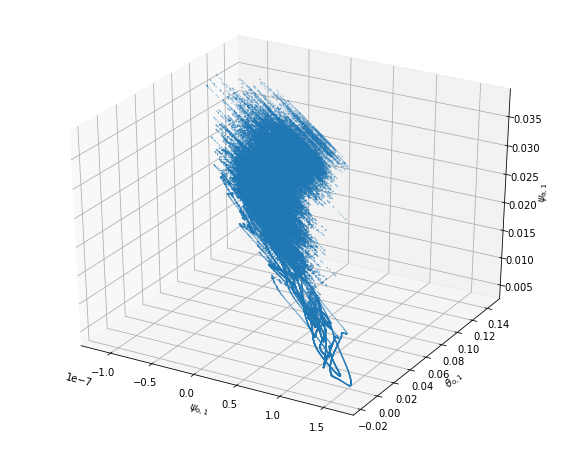

In [16]:
varx = 20
vary = 30
varz = 0

fig = plt.figure(figsize=(10, 8))
axi = fig.gca(projection='3d')

axi.scatter(traj[varx], traj[vary], traj[varz], s=0.2);

axi.set_xlabel('$'+model_parameters.latex_var_string[varx]+'$')
axi.set_ylabel('$'+model_parameters.latex_var_string[vary]+'$')
axi.set_zlabel('$'+model_parameters.latex_var_string[varz]+'$');

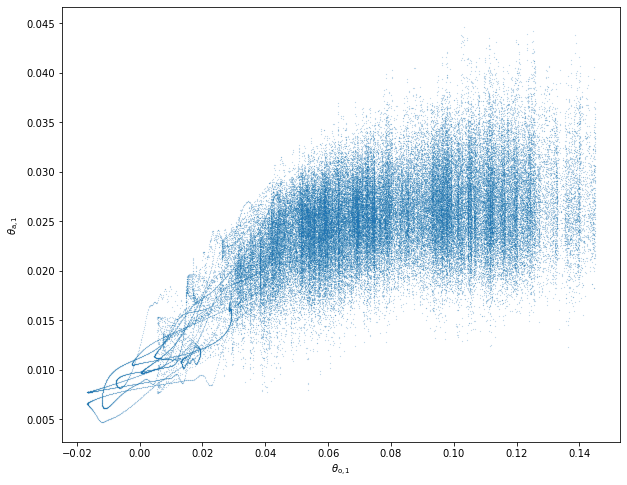

In [17]:
varx = 30
vary = 10
plt.figure(figsize=(10, 8))

plt.plot(traj[varx], traj[vary], marker='o', ms=0.1, ls='')

plt.xlabel('$'+model_parameters.latex_var_string[varx]+'$')
plt.ylabel('$'+model_parameters.latex_var_string[vary]+'$');

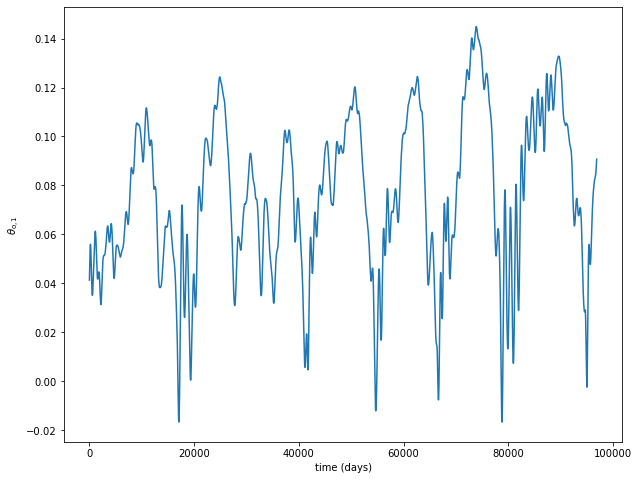

In [18]:
var = 30
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*time, traj[var])

plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

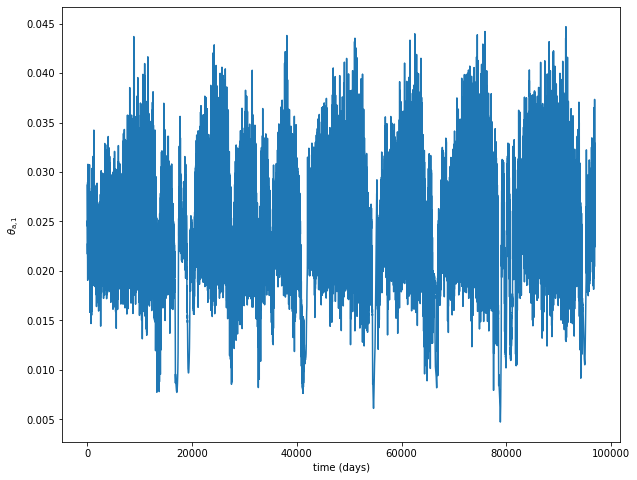

In [19]:
var = 10
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*time, traj[var])

plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

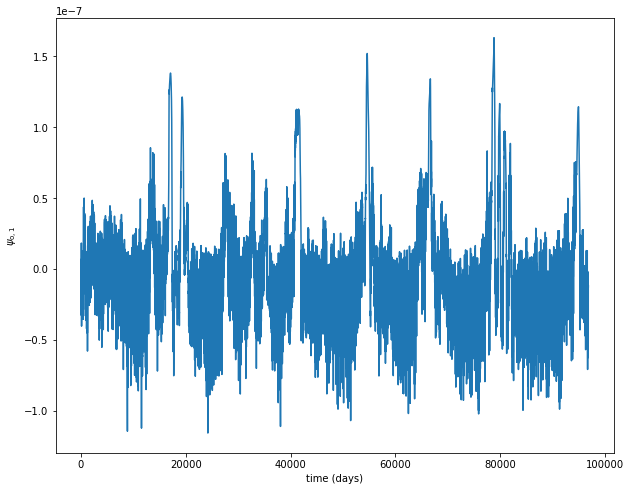

In [20]:
var = 20
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*time, traj[var])

plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');